In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
#importing data
data = pd.read_csv("financial_data.csv")
print(data.shape)
data.head()

(17908, 21)


,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [3]:
#checking for imbalanced data
data.e_signed.value_counts()

1    9639
0    8269
Name: e_signed, dtype: int64

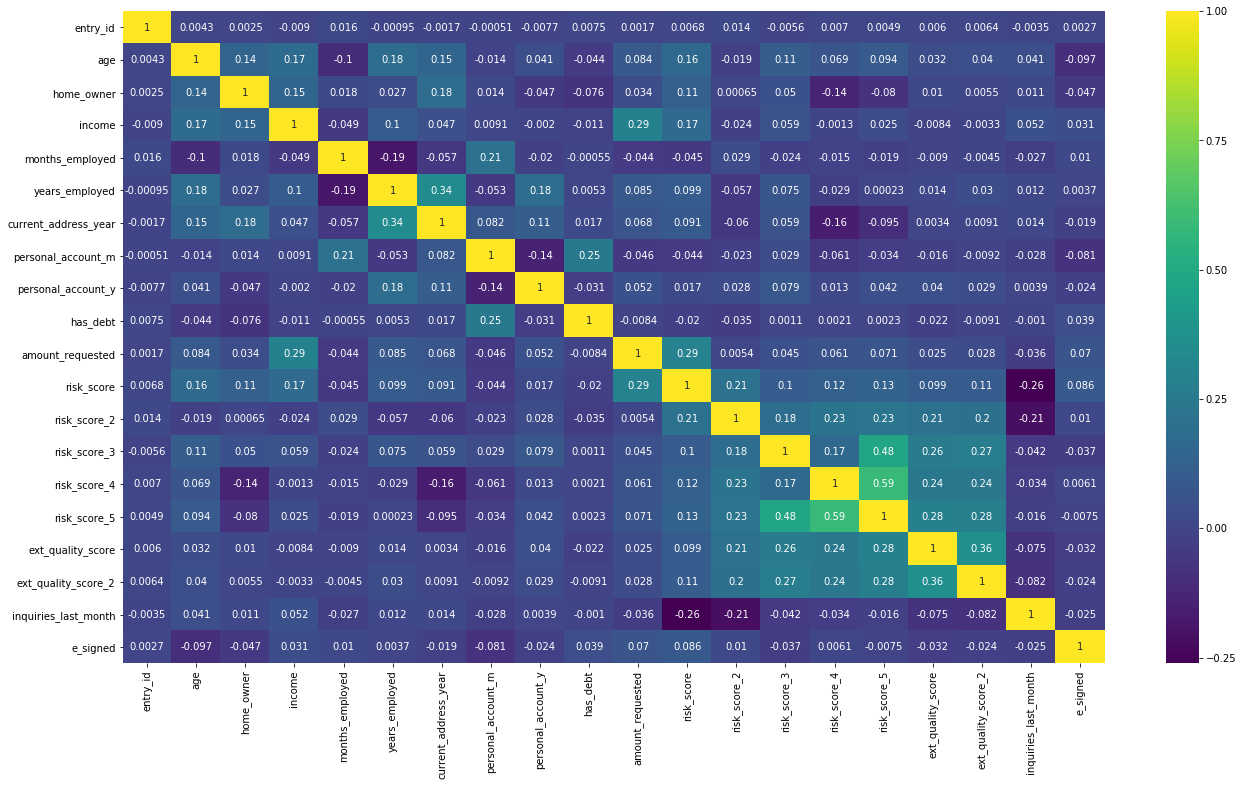

In [4]:
#ploting the corolation matrix to detect the multicolinearity

plt.figure(figsize=(22,12))
sns.heatmap(data.corr(), annot =True, cmap='viridis')

In [5]:
#split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('entry_id', axis =1), data.e_signed, test_size =0.2, random_state =0)

In [6]:
#find categorical features
cat_var = [col for col in X_train.columns if X_train[col].dtype =='O']
cat_var

['pay_schedule']

In [7]:
#checking for null values in train and test sets
[col for col in X_train.columns if X_train[col].isnull().sum() > 0]

[]

In [8]:
[col for col in X_test.columns if X_test[col].isnull().sum() > 0]

[]

In [9]:

def categorical_encode(var , target):
    order = X_train.groupby(var)[target].mean().to_dict()
    X_train[var] = X_train[var].map(order)
    X_test[var] = X_test[var].map(order)

In [10]:
categorical_encode('pay_schedule', 'e_signed')

In [11]:
X_train = X_train.drop('e_signed', axis =1)
X_test= X_test.drop('e_signed', axis =1)

In [12]:
X_train.describe()

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
count,14326.000000,14326.000000,14326.000000,14326.000000,14326.000000,14326.000000,14326.000000,14326.000000,14326.000000,14326.000000,14326.000000,14326.000000,14326.000000,14326.000000,14326.000000,14326.000000,14326.000000,14326.000000,14326.000000
mean,43.071339,0.538252,0.423077,3658.985551,1.184001,3.534343,3.573922,3.421751,3.505165,0.795477,949.228187,61036.095212,0.691829,0.878129,0.583080,0.717571,0.623028,0.622798,6.438992
std,11.907565,0.018315,0.494065,1501.900351,2.396026,2.254437,2.744237,2.217962,1.941035,0.403367,699.125123,15398.751599,0.090317,0.054626,0.126021,0.120971,0.139633,0.139768,3.676805
min,18.000000,0.527749,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000
25%,34.000000,0.527749,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.642247,0.850848,0.499848,0.632740,0.521980,0.520969,4.000000
50%,42.000000,0.527749,0.000000,3265.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.700006,0.880993,0.588465,0.724552,0.625687,0.624402,6.000000
75%,51.000000,0.539911,1.000000,4675.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72650.000000,0.753616,0.912619,0.672962,0.806133,0.729171,0.729323,8.000000
max,96.000000,0.586849,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.993363,0.966953,0.966953,30.000000


In [13]:
#standarization of train and test set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scalled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [14]:
from sklearn.metrics import roc_auc_score

In [15]:
import xgboost as xgb
xgb_model  = xgb.XGBClassifier()

xgb_model.fit(X_train, y_train)

pred = xgb_model.predict_proba(X_train)
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))

pred = xgb_model.predict_proba(X_test)
xgb_pred=roc_auc_score(y_test, pred[:,1])
print('xgb test roc-auc: {}'.format(xgb_pred))

xgb train roc-auc: 0.7341793334864457
xgb test roc-auc: 0.6933742605628503


In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = rf_model.predict_proba(X_test)
rf_pred=roc_auc_score(y_test, pred[:,1])
print('RF test roc-auc: {}'.format(rf_pred))
#clear sign of overcfitting

RF train roc-auc: 1.0
RF test roc-auc: 0.6980968744198649


In [17]:
##takes time
from sklearn.model_selection import GridSearchCV
params={ 'max_depth':[6,10],
        'criterion':['gini', 'entropy'],
        'max_leaf_nodes':[5,8,10]
}
gridsearch = GridSearchCV(rf_model, params, scoring ='accuracy', cv =10)
gridsearch = gridsearch.fit(X_train, y_train)

In [18]:
gridsearch.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 10}

In [19]:
rf_model = RandomForestClassifier(n_estimators=200, criterion = 'gini', max_depth = 10, max_leaf_nodes = 10)
rf_model.fit(X_train, y_train)

pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = rf_model.predict_proba(X_test)
rf_pred=roc_auc_score(y_test, pred[:,1])
print('RF test roc-auc: {}'.format(rf_pred))

RF train roc-auc: 0.6731723672624427
RF test roc-auc: 0.6579463465909375


In [20]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

pred = ada_model.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = ada_model.predict_proba(X_test)
ada_pred =roc_auc_score(y_test, pred[:,1])
print('Adaboost test roc-auc: {}'.format(ada_pred))

Adaboost train roc-auc: 0.6765294212614368
Adaboost test roc-auc: 0.6517389002895031


In [21]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train_scalled, y_train)
pred = svc.predict_proba(X_train_scalled)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = svc.predict_proba(X_test_scaled)
svc_pred =roc_auc_score(y_test, pred[:,1])
print('RF test roc-auc: {}'.format(svc_pred))

RF train roc-auc: 0.7704559055282512
RF test roc-auc: 0.6515780303752502


In [22]:
models = pd.DataFrame({'Models':['xgboost','random forest','adaboost', 'svc'],
                     'score' :[xgb_pred,rf_pred,ada_pred, svc_pred]})
models

,Models,score
0,xgboost,0.693374
1,random forest,0.657946
2,adaboost,0.651739
3,svc,0.651578


In [23]:
models.sort_values(by ='score', ascending =False)


,Models,score
0,xgboost,0.693374
1,random forest,0.657946
2,adaboost,0.651739
3,svc,0.651578


In [24]:
from sklearn.ensemble import VotingClassifier

estimators = [('xgb' ,xgb_model) , ('rf', rf_model),('ada', ada_model ),('svc', svc)]
voting_cl = VotingClassifier(estimators, voting='soft')
              

In [25]:
ensemble = voting_cl.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
ensemble_prediction = ensemble.predict_proba(X_test)[:, 1]

In [27]:
ensemble_prediction

array([0.51127815, 0.54538821, 0.52846455, ..., 0.52998198, 0.52964481,
       0.55602914])

In [28]:
roc_auc_score(y_test, ensemble_prediction)

0.6877690572834874